# Bootstrap to estimate SE of regression parameters

In [19]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import random

In [6]:
# Data generating process
x1 = np.linspace(0,1,100)
eps = np.random.randn(100)
y = 1 + 3*x1 + eps

C:\Users\edogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

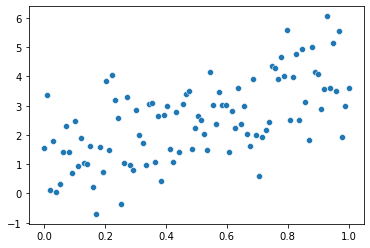

In [14]:
sns.scatterplot(x1,y)

In [20]:
x1 = sm.add_constant(x1)
model = sm.OLS(y,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     62.06
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.62e-12
Time:                        17:36:23   Log-Likelihood:                -150.00
No. Observations:                 100   AIC:                             304.0
Df Residuals:                      98   BIC:                             309.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0333      0.217      4.752      0.000       0.602       1.465
x1             2.9597      0.376      7.878      0.000       2.214       3.705
==============================================================================
Omnibus:                        1.553   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.291
Skew:                           0.089   Prob(JB):                        0.524
Kurtosis:                       2.473   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### To estimate SE with Bootstrap
1. Create a sample
2. Estimate parameters
3. Calculate SE of the sequence of estimated parameters

In [71]:
np.random.seed(206)
n_bootstrap = 1000
betas_boot = np.zeros((1,n_bootstrap))

for i in range(n_bootstrap):
    sample_indices = np.random.randint(0, x1.shape[0], x1.shape[0])
    x1_boot = x1[sample_indices]
    y_boot = y[sample_indices]
    model_boot = sm.OLS(y_boot,x1_boot).fit()
    betas_boot[0,i] = model_boot.params[1]
    
se_boot = betas_boot.std()

## Now wrap in a function

In [75]:
def bootstrap_linear_regression(X, y, n_bootstraps=1000):
    """
    Estimate the standard errors of the parameters in a linear regression model using the bootstrap method.
    
    Parameters:
    - X: a 2D array of independent variables (shape: n_samples x n_features)
    - y: a 1D array of dependent variables (shape: n_samples)
    - n_bootstraps: the number of bootstrap samples to draw (default: 1000)
    
    Returns:
    - beta_se: a 1D array of standard errors for the regression coefficients (shape: n_features)
    - intercept_se: a scalar standard error for the intercept
    """
    # import required modules
    import numpy as np
    from sklearn.linear_model import LinearRegression
    
    # initialize arrays to store bootstrapped coefficients and intercepts
    beta_bootstrapped = np.zeros((n_bootstraps, X.shape[1]))
    intercept_bootstrapped = np.zeros(n_bootstraps)
    
    # draw bootstrap samples and fit linear regression model
    for i in range(n_bootstraps):
        sample_indices = np.random.randint(0, X.shape[0], X.shape[0])
        X_sample = X[sample_indices, :]
        y_sample = y[sample_indices]
        model = LinearRegression().fit(X_sample, y_sample)
        beta_bootstrapped[i, :] = model.coef_
        intercept_bootstrapped[i] = model.intercept_
    
    # calculate standard errors for coefficients and intercept
    beta_se = np.std(beta_bootstrapped, axis=0)
    intercept_se = np.std(intercept_bootstrapped)

    return beta_se, intercept_se


In [76]:
bootstrap_linear_regression(x1[:,1].reshape(-1,1), y, n_bootstraps=2000)

(array([0.38960982]), 0.2182822763805789)